In [3]:
# !pip install librosa
# !pip install llvmlite.llvmpy

Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not find a version that satisfies the requirement llvmlite.llvmpy (from versions: none)
ERROR: No matching distribution found for llvmlite.llvmpy


In [1]:
#calling all dependencies
import numpy as np
from hmmlearn import hmm
from scipy.io import wavfile
from python_speech_features import mfcc, delta
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import librosa
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [13]:
# Load audio file
file_path = r'C:\Users\shrey\eclipse-workspace\project3\VSCode\speech_processing\shreya_fries.wav'
audio, sampling_freq = librosa.load(file_path, sr=None, mono=True)

print('\nShape:', audio.shape)
print('Datatype:', audio.dtype)
print('Duration:', librosa.get_duration(y=audio, sr=sampling_freq), 'seconds')


Shape: (124928,)
Datatype: float32
Duration: 2.6026666666666665 seconds


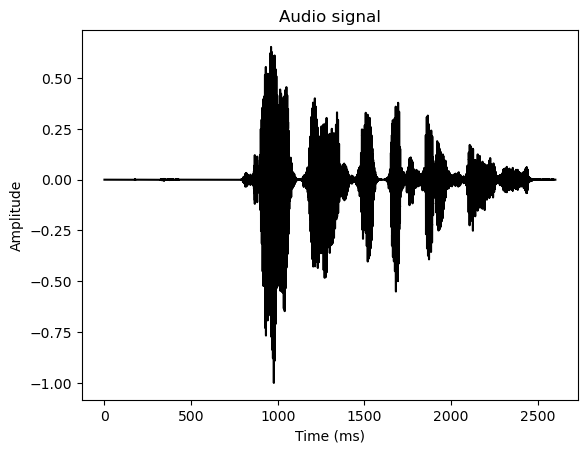

In [14]:
# Normalizing the audio data
audio /= np.max(np.abs(audio))  # Normalizing to the range [-1, 1]

# Plotting
time_ms = np.arange(0, len(audio)) / float(sampling_freq) * 1000
plt.plot(time_ms, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()

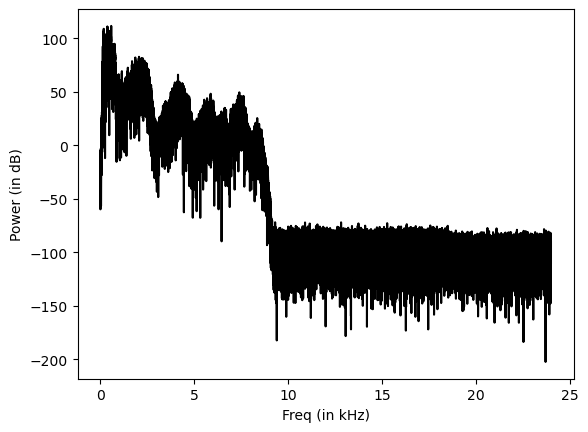

In [15]:
#tranforming the audio from time domain to frequency domain to extract mfcc feature coefficients
transformed_signal = np.fft.fft(audio)

half_length = np.ceil((len(audio) + 1) / 2.0)
half_length=int(half_length)
transformed_signal = abs(transformed_signal[0:half_length])
transformed_signal **= 2

#power spectrum plot for the frequency domain audio signal
power = 20 * np.log10(transformed_signal)
x_values = np.arange(0, half_length, 1) * ((sampling_freq / len(audio)) / 1000.0)
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()

[[-36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339]
 [-36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339 -36.04365339 -36.04365339 -36.04365339 -36.04365339
  -36.04365339]]


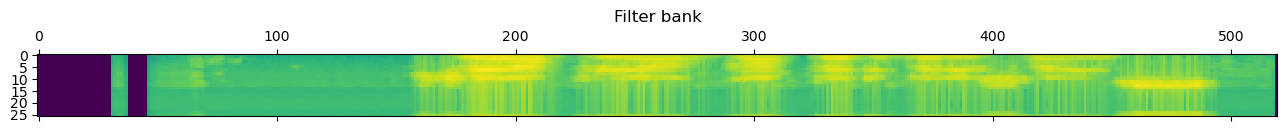

In [16]:
#obtaining mfcc features
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt


#Read in the audio file
(rate,sig) = wav.read(file_path)
# Calculate the mfcc features based on the file data
mfcc_feat = mfcc(sig, rate, nfft=1200)
# Calculate the filterbank from the audio file
fbank_feat = logfbank(sig, rate, nfft=1200)

#Print the result
print(fbank_feat[1:3, :])
filterbank_features = fbank_feat.T
plt.matshow(filterbank_features)
plt.title('Filter bank')

plt.show()

fbank_feat.shape
Out[4]: (111, 26)
input_data = wav.read(file_path)

In [17]:
# Class to handle all HMM related processing
class HMMTrainer(object):

    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []

        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components,
                    covariance_type=self.cov_type, n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type')

    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))
    # Run the model on input data
    def get_score(self, input_data):
        print('score',self.model.score(input_data))
        return self.model.score(input_data)